In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Filling Null values with Mode

columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed','LoanAmount']

In [8]:
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

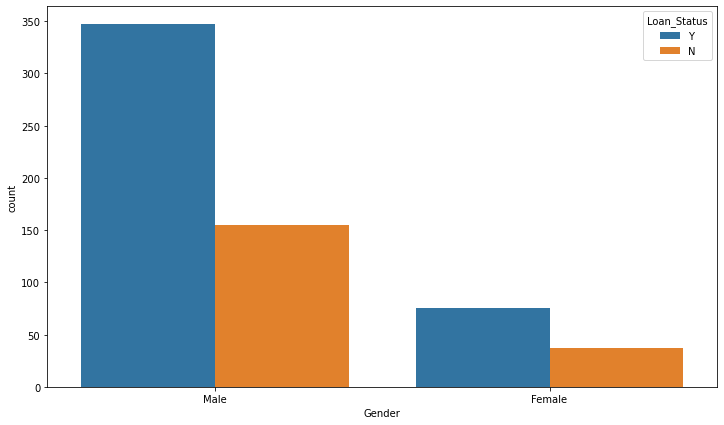

In [10]:
plt.figure(figsize=[12,7])
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

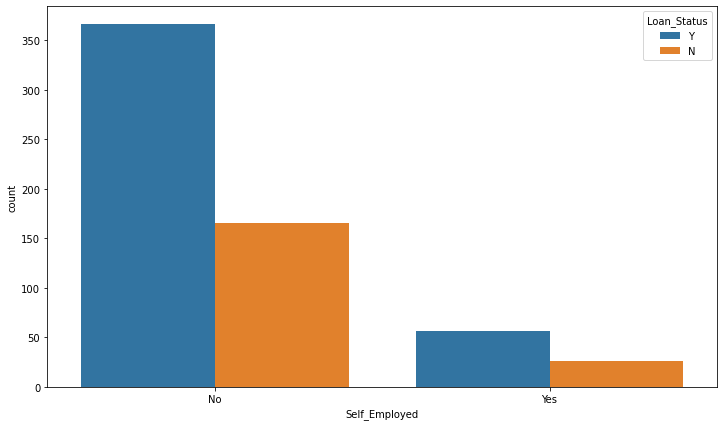

In [11]:
plt.figure(figsize=[12,7])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

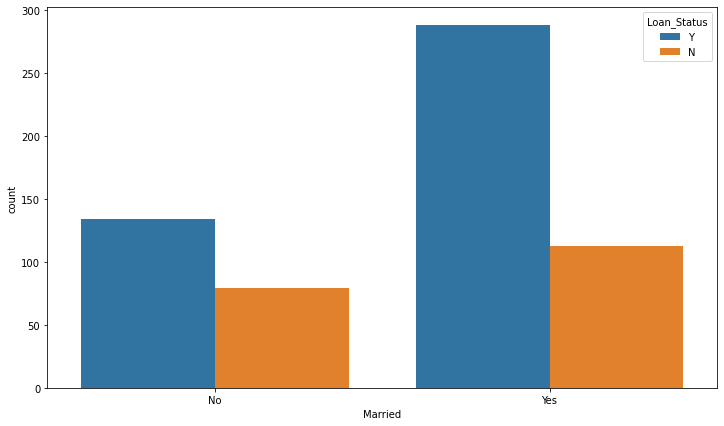

In [12]:
plt.figure(figsize=[12,7])
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

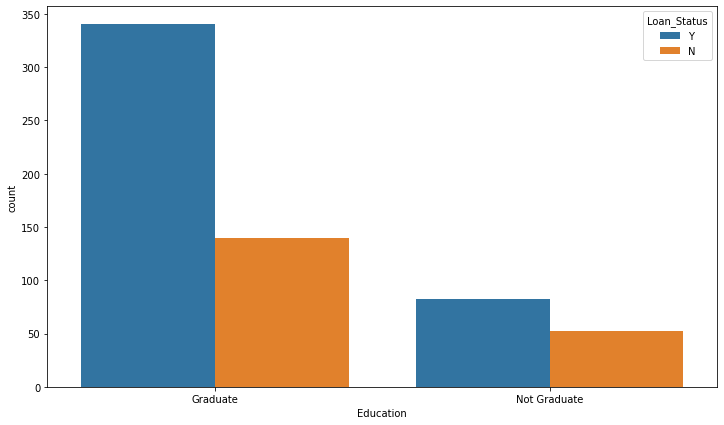

In [13]:
plt.figure(figsize=[12,7])
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

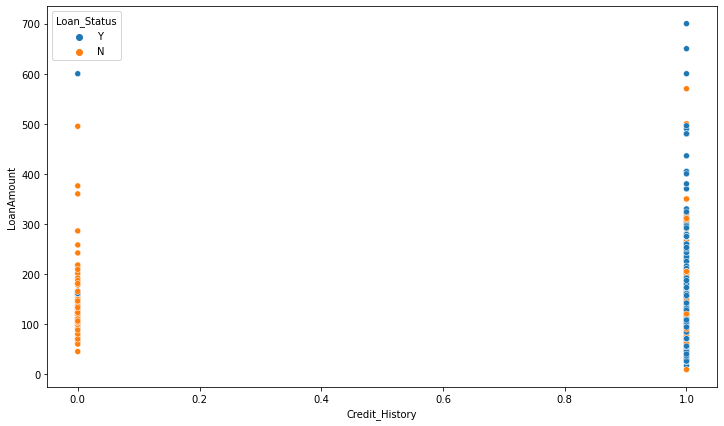

In [14]:
plt.figure(figsize=[12,7])
sns.scatterplot(df['Credit_History'],df['LoanAmount'],hue=df['Loan_Status'])

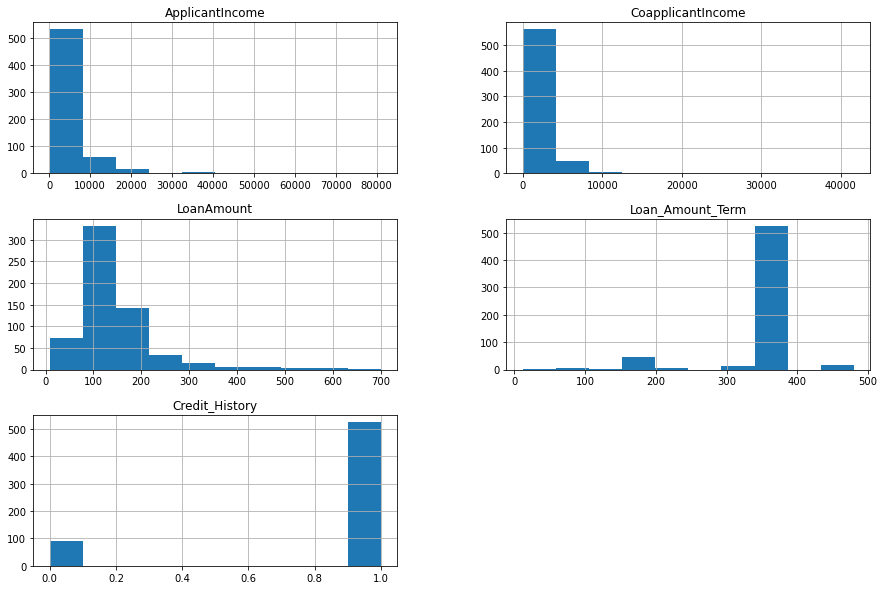

<Figure size 720x288 with 0 Axes>

In [15]:
df.hist(figsize=(15,10),bins=10)
plt.figure(figsize=(10,4))
plt.show()

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

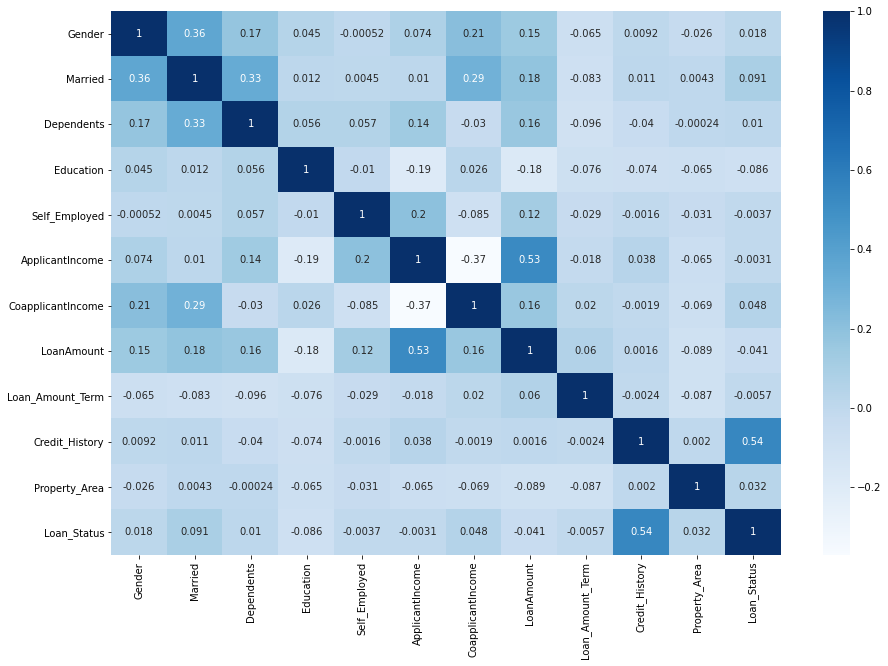

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [18]:
#Using LabelEncoder for convering categorical to numerical

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,73,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,162,8,1,2,1
612,612,1,1,2,0,0,422,0,132,8,1,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int32
 1   Gender             614 non-null    int32
 2   Married            614 non-null    int32
 3   Dependents         614 non-null    int32
 4   Education          614 non-null    int32
 5   Self_Employed      614 non-null    int32
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int64
 8   LoanAmount         614 non-null    int64
 9   Loan_Amount_Term   614 non-null    int64
 10  Credit_History     614 non-null    int64
 11  Property_Area      614 non-null    int32
 12  Loan_Status        614 non-null    int32
dtypes: int32(8), int64(5)
memory usage: 43.3 KB


In [21]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.517449
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [22]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [23]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

# Checking for outliers

Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Education            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.110714x0.343182)
LoanAmount              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.390714,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.656429,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

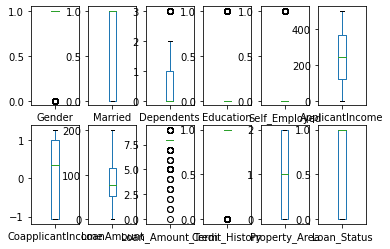

In [24]:
df.plot(kind='box',layout=(2,6),subplots=True)

# Removing outiers

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [26]:
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [27]:
df_new=df[(z<3).all(axis=1)]

In [28]:
df.shape

(614, 12)

In [29]:
df_new.shape

(602, 12)

In [30]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [31]:
x.shape

(614, 11)

In [32]:
y.shape

(614,)

# Spliting Train and Test data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [35]:
x_train.shape

(448, 11)

In [36]:
x_test.shape

(166, 11)

In [37]:
y_train.shape

(448,)

In [38]:
y_test.shape

(166,)

# Model making 

Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.7590361445783133
[[ 25  32]
 [  8 101]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        57
           1       0.76      0.93      0.83       109

    accuracy                           0.76       166
   macro avg       0.76      0.68      0.70       166
weighted avg       0.76      0.76      0.74       166



Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6927710843373494
[[28 29]
 [22 87]]
              precision    recall  f1-score   support

           0       0.56      0.49      0.52        57
           1       0.75      0.80      0.77       109

    accuracy                           0.69       166
   macro avg       0.66      0.64      0.65       166
weighted avg       0.68      0.69      0.69       166



SVC

In [43]:
from sklearn.svm import SVC

svc=SVC()                             
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6566265060240963
[[  0  57]
 [  0 109]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.66      1.00      0.79       109

    accuracy                           0.66       166
   macro avg       0.33      0.50      0.40       166
weighted avg       0.43      0.66      0.52       166



Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test, predlg))
print(confusion_matrix(y_test, predlg))
print(classification_report(y_test,predlg))

0.7771084337349398
[[ 22  35]
 [  2 107]]
              precision    recall  f1-score   support

           0       0.92      0.39      0.54        57
           1       0.75      0.98      0.85       109

    accuracy                           0.78       166
   macro avg       0.84      0.68      0.70       166
weighted avg       0.81      0.78      0.75       166



GaussianNB Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
gnb.score(x_train,y_train)
print(accuracy_score(y_test, predgnb))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test,predgnb))

0.7710843373493976
[[ 22  35]
 [  3 106]]
              precision    recall  f1-score   support

           0       0.88      0.39      0.54        57
           1       0.75      0.97      0.85       109

    accuracy                           0.77       166
   macro avg       0.82      0.68      0.69       166
weighted avg       0.80      0.77      0.74       166



# Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# Random Forest Classifier

print(cross_val_score(rfc,x,y,cv=5).mean())

0.7882846861255498


In [48]:
# Decision Tree Classifier

print(cross_val_score(dtc,x,y,cv=5).mean())

0.7247234439557511


In [49]:
# Support Vector Classifier

print(cross_val_score(svc,x,y,cv=5).mean())

0.6872984139677463


In [50]:
#GaussianNB Classifier

print(cross_val_score(gnb,x,y,cv=5).mean())

0.8062108489937359


In [51]:
#Logistic Regression

print(cross_val_score(lg,x,y,cv=5).mean())

0.8061975209916034


AUC ROC curve

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [53]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [54]:
y_pred_prob

array([0.71650774, 0.76050135, 0.84860064, 0.80087278, 0.73119785,
       0.85244889, 0.80447964, 0.78307943, 0.7663685 , 0.84998192,
       0.19870433, 0.8168751 , 0.76770208, 0.80717587, 0.89451757,
       0.88136293, 0.73571881, 0.81062221, 0.8392016 , 0.87087704,
       0.80305452, 0.84916865, 0.70819761, 0.74850206, 0.87552246,
       0.80023116, 0.76769743, 0.6914538 , 0.85351533, 0.9155806 ,
       0.86836901, 0.89689568, 0.76918581, 0.81826729, 0.82598942,
       0.06288054, 0.82140449, 0.83443606, 0.86201274, 0.87262755,
       0.7105975 , 0.77704067, 0.7771098 , 0.84176606, 0.8156126 ,
       0.72111125, 0.83507935, 0.20428526, 0.17250076, 0.15670137,
       0.63666526, 0.74326578, 0.13713617, 0.70855782, 0.81656765,
       0.69591578, 0.78319643, 0.72642579, 0.17859428, 0.76874288,
       0.17422699, 0.85338584, 0.1663218 , 0.74901234, 0.86359814,
       0.77035294, 0.89105642, 0.9027693 , 0.85583293, 0.65113745,
       0.09644033, 0.84992976, 0.76214434, 0.85554797, 0.24746

In [55]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [56]:
fpr

array([0.        , 0.        , 0.        , 0.01754386, 0.01754386,
       0.03508772, 0.03508772, 0.05263158, 0.05263158, 0.0877193 ,
       0.0877193 , 0.10526316, 0.10526316, 0.12280702, 0.12280702,
       0.14035088, 0.14035088, 0.15789474, 0.15789474, 0.1754386 ,
       0.1754386 , 0.19298246, 0.19298246, 0.21052632, 0.21052632,
       0.22807018, 0.22807018, 0.24561404, 0.24561404, 0.26315789,
       0.26315789, 0.28070175, 0.28070175, 0.29824561, 0.29824561,
       0.33333333, 0.33333333, 0.35087719, 0.35087719, 0.36842105,
       0.36842105, 0.38596491, 0.38596491, 0.42105263, 0.42105263,
       0.43859649, 0.43859649, 0.47368421, 0.47368421, 0.50877193,
       0.50877193, 0.52631579, 0.52631579, 0.54385965, 0.54385965,
       0.57894737, 0.57894737, 0.61403509, 0.61403509, 0.70175439,
       0.70175439, 0.9122807 , 0.9122807 , 1.        ])

In [57]:
tpr

array([0.        , 0.00917431, 0.0733945 , 0.0733945 , 0.10091743,
       0.10091743, 0.12844037, 0.12844037, 0.19266055, 0.19266055,
       0.21100917, 0.21100917, 0.2293578 , 0.2293578 , 0.26605505,
       0.26605505, 0.33944954, 0.33944954, 0.34862385, 0.34862385,
       0.3853211 , 0.3853211 , 0.39449541, 0.39449541, 0.41284404,
       0.41284404, 0.42201835, 0.42201835, 0.44036697, 0.44036697,
       0.44954128, 0.44954128, 0.6146789 , 0.6146789 , 0.62385321,
       0.62385321, 0.65137615, 0.65137615, 0.66972477, 0.66972477,
       0.69724771, 0.69724771, 0.76146789, 0.76146789, 0.7706422 ,
       0.7706422 , 0.78899083, 0.78899083, 0.82568807, 0.82568807,
       0.93577982, 0.93577982, 0.94495413, 0.94495413, 0.95412844,
       0.95412844, 0.97247706, 0.97247706, 0.98165138, 0.98165138,
       0.99082569, 0.99082569, 1.        , 1.        ])

In [58]:
threshold

array([1.91685248, 0.91685248, 0.88136293, 0.88027617, 0.8742617 ,
       0.87262755, 0.86836901, 0.86789127, 0.85730521, 0.85554797,
       0.85341568, 0.85338584, 0.85189242, 0.84998192, 0.84811942,
       0.84795799, 0.83776837, 0.83507935, 0.83443606, 0.83234914,
       0.83017211, 0.83008298, 0.82975944, 0.82925357, 0.82690629,
       0.82598942, 0.8228876 , 0.8222671 , 0.82173807, 0.82140449,
       0.81896049, 0.81843282, 0.80087278, 0.80034095, 0.80023116,
       0.79914109, 0.78579907, 0.78319643, 0.781373  , 0.7771098 ,
       0.77397533, 0.77241736, 0.76769743, 0.763992  , 0.76328731,
       0.76214434, 0.76050135, 0.75509579, 0.74850206, 0.74326578,
       0.7105975 , 0.70855782, 0.70819761, 0.69591578, 0.69500921,
       0.68308059, 0.66331892, 0.63666526, 0.61594062, 0.17859428,
       0.17422699, 0.12700793, 0.12531184, 0.06288054])

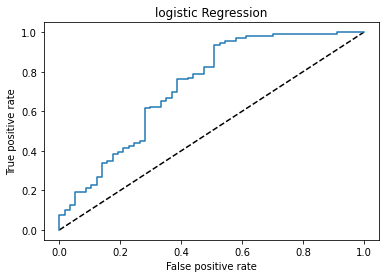

In [59]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('logistic Regression')
plt.show()

# Saving the Model 

In [61]:
import pickle

In [62]:
file1='pickledtcfile.pkl'
pickle.dump(dtc,open(file1,'wb'))
#load the the model from disk
loaded_model=pickle.load(open(file1,'rb'))

loaded_model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])